In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
from src.functions.basic_functions import coordinates_change
from src.functions.grid import land_reference_subunit,construct_grid, estimate_kernel_density_database
from src.functions.weights import weigths_continent, weighted_plants_dataset
from src.functions.plots import unweighted_plot_density, choose_bandwidth,weighted_plants_plot_density,weighted_plot_density, plot_density_combination

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.basemap import Basemap
import global_land_mask,tqdm, itertools
from global_land_mask import globe
import sklearn
sklearn.set_config(enable_metadata_routing=True)
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


In [5]:
path="P:\\Projets Internes\\PLADIFES\\PLADIFES DATA CREATION\\Sectorial wealth\\"
df_gspt=pd.read_csv(path+"data\\clean_data\\steel_factories_dataset_reg.csv")

In [4]:
df_gspt["Region"].unique()

array(['Africa', 'Australia', 'Asia', 'Central & South America', 'Europe',
       'North America'], dtype=object)

In [10]:
europe=land_reference_subunit(-10,42,31,70,0.1)

In [11]:
land_mask_europe=(europe > -9999).ravel()

In [12]:
a=np.save("land_mask_Europe.npy",land_mask_europe)

Cross-Validation Bandwiths

In [5]:
choose_bandwidth('Europe','exponential') # 0.041363636363636366
choose_bandwidth('Europe','gaussian') #0.08172727272727273

0.08172727272727273

In [4]:
choose_bandwidth('world','exponential') 

0.13218181818181818

Maps

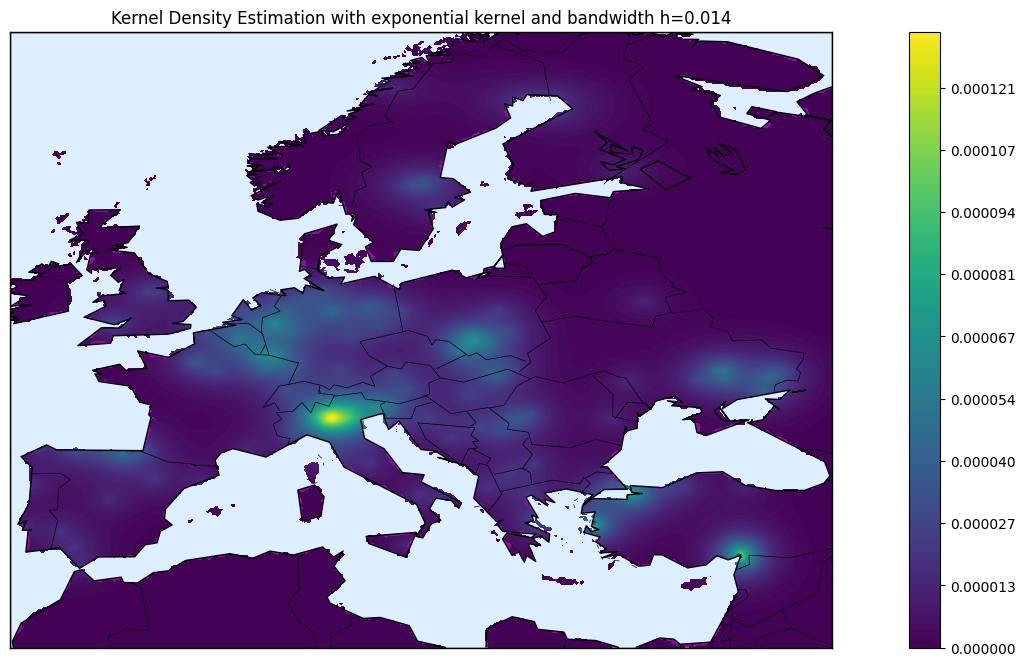

In [3]:
unweighted_plot_density('Europe','exponential',0.014)

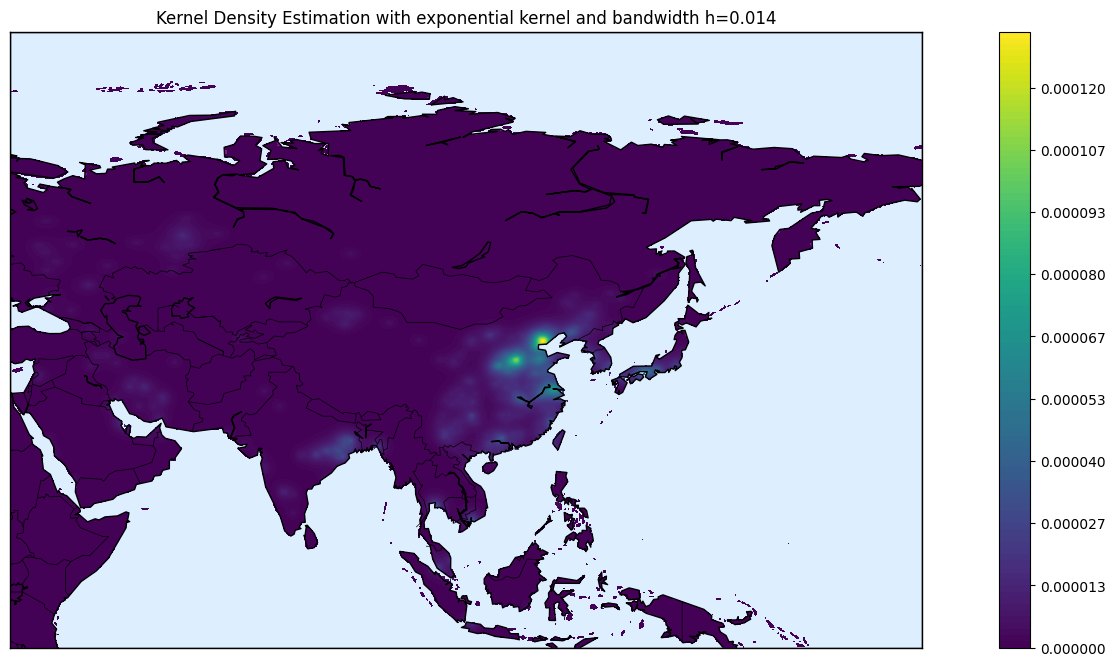

In [34]:
unweighted_plot_density('Asia','exponential',0.014)

In [ ]:
weighted_plants_plot_density('Europe', 'exponential', 0.014)

In [ ]:
weighted_plot_density('Asia', 'exponential', 0.014)

In [ ]:
unweighted_plot_density('world','exponential',0.007)

Mix LitPop & Kernel Maps

In [4]:
world=pd.read_csv(path+"data\intermediary_data\densities\world_all_densities.csv")

In [ ]:
plot_density_combination(world,0.5)

In [ ]:
plot_density_combination(world,0)

Check capacity 

In [10]:
steel_capacity=df_gspt['Nominal crude steel capacity (ttpa)']
total_cap=steel_capacity.sum()

list_cont=['Europe','Africa','Central & South America','North America','Australia','Asia']
capacity_continent={}
for cont in list_cont:
    steel_capacity=df_gspt.loc[df_gspt["Region"]==cont]['Nominal crude steel capacity (ttpa)']
    capacity_continent[cont]=steel_capacity.sum()/total_cap


2247100.28875

In [6]:
xgrid,ygrid=construct_grid('world',0.1)
X, Y = np.meshgrid(xgrid, ygrid)
land_mask = np.load(path+"data\intermediary_data\land_mask\land_mask_"+'world' +".npy")
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

kde = KernelDensity(bandwidth=0.015, metric='haversine',kernel='exponential').set_fit_request(sample_weight=True)
kde.fit(np.radians(coordinates_change(df_gspt)),
            sample_weight=weigths_continent('world'))

# evaluate only on the land: -9999 indicates ocean
Z = np.full(land_mask.shape[0], -9999,dtype=np.float64)
Z[land_mask] = np.exp(kde.score_samples(xy))


In [27]:
xgrid,ygrid=construct_grid('world',0.1)
X, Y = np.meshgrid(xgrid, ygrid)
land_mask = np.load(path+"data\intermediary_data\land_mask\land_mask_"+'world' +".npy")
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

kde = KernelDensity(bandwidth=0.025, metric='haversine',kernel='exponential')
kde.fit(np.radians(coordinates_change(df_gspt)))
            

# evaluate only on the land: -9999 indicates ocean
Z = np.full(land_mask.shape[0], -9999,dtype=np.float64)
Z[land_mask] = np.exp(kde.score_samples(xy))
sum_world=Z[land_mask].sum()


In [27]:
339134.95555386535/379364.79237119807

0.8939547432278088

In [23]:
kde = KernelDensity(bandwidth=0.025, metric='haversine',kernel='exponential')
kde.fit(np.radians(coordinates_change(df_gspt)))
list_cont=['Europe','Africa','Central & South America','North America','Australia','Asia']
dict={}
for cont in list_cont:
    print(cont)
    xgrid,ygrid=construct_grid(cont,0.1)
    X, Y = np.meshgrid(xgrid, ygrid)
    land_mask = np.load(path+"data\intermediary_data\land_mask\land_mask_"+cont +".npy")
    xy = np.vstack([Y.ravel(), X.ravel()]).T
    xy = np.radians(xy[land_mask])
    Z = np.full(land_mask.shape[0], -9999,dtype=np.float64)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    dict[cont]=Z[land_mask].sum()

Europe
Africa
Central & South America
North America
Australia
Asia


In [35]:
sum_world

323723.72946058796

In [36]:
sum_world/348859.00175352034

0.9279500538424081

In [25]:
for key in dict:
    dict[key] = dict[key] / 348859.00175352034

In [37]:
sum(dict.values())

1.0000000000000002

In [32]:
dict
                  

{'Europe': 0.20327471707914152,
 'Africa': 0.043998341219973064,
 'Central & South America': 0.02662481844989506,
 'North America': 0.11591585992987662,
 'Australia': 0.0035701732143887444,
 'Asia': 0.6066160901067251}

In [33]:
capacity_continent

{'Europe': 0.13548460721766709,
 'Africa': 0.017733965946917063,
 'Central & South America': 0.026892435688135465,
 'North America': 0.06810705757825068,
 'Australia': 0.0028748160606545605,
 'Asia': 0.7489071175083751}